In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from matplotlib.ticker import MaxNLocator

2024-02-06 21:07:33.730479: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 21:07:34.282698: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Change fonts and specify font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
FONT_SIZE = 12

In [3]:
# Define necessary functions
# Function to save files
def save_file(values, file_name, file_directory):
    
    # Save the file as a .npy file
    np.save(os.path.join(file_directory, file_name), values)
    
    print(f'Saved {file_name} to {file_directory}')

In [4]:
# CNN class
class CNN():

    def __init__(self, input_shape, output_shape):
        
        self.input_shape = input_shape
        self.output_shape = output_shape
        
        # Initialize input_layer here
        self.input_layer = None  

    # Method to build the hidden layers
    def build_hidden_layers(self):
        
        # Convolutional Layers
        # First Convolutional Layer
        x1 = tf.keras.layers.Conv1D(filters=600, kernel_size=95, padding='same', activation='LeakyReLU', kernel_initializer = 'glorot_normal')(self.input_layer)
        x1 = tf.keras.layers.BatchNormalization()(x1)

        # Second Convolutional Layer
        x2 = tf.keras.layers.Conv1D(filters=400, kernel_size=95, padding='same', activation='LeakyReLU', kernel_initializer = 'glorot_normal')(x1)
        x2 = tf.keras.layers.BatchNormalization()(x2)
        
        # Third Convolutional Layer
        x3 = tf.keras.layers.Conv1D(filters=100, kernel_size=95, padding='same', activation='LeakyReLU', kernel_initializer = 'glorot_normal')(x2)
        x3 = tf.keras.layers.BatchNormalization()(x3)

        return x3

    # Method to build the overall model
    def build_model(self):
        
        # Input layer
        self.input_layer = tf.keras.layers.Input(shape=self.input_shape)

        # Hidden layer
        hidden_layer = self.build_hidden_layers()

        # Output Layer
        output_layer = tf.keras.layers.Conv1D(filters=self.output_shape[1], kernel_size=95, padding='same', activation='LeakyReLU', kernel_initializer = 'glorot_normal')(hidden_layer)

        # Build model
        self.model = tf.keras.models.Model(inputs=[self.input_layer], outputs=[output_layer])

        return self.model

    # Method to compile the model
    def compile(self, optimizer, loss, evaluation_metric):
        
        # Compile model
        self.model.compile(optimizer=optimizer, loss=loss, metrics=evaluation_metric)

        return self.model
    
    # Define method to train the model
    def train(self, x_train, y_train, epochs, batch_size, callbacks):
        
        # Train model
        self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)
        
        return self.history
    
    # Method to print summary of model
    def summary(self):
        
        self.model.summary()

In [5]:
class plots:
    
    def __init__(self, history, file_directory):

        self.history = history
        self.file_directory = file_directory

    def loss(self):

        loss_name = list(self.history.history.keys())[0]

        # Training
        loss = self.history.history[loss_name]
        val_loss = self.history.history['val_' + loss_name]

        loss_plot = plt.figure()
        epochs = range(1, len(loss)+1)
        plt.plot(epochs, loss, 'bo--', label = 'Training Loss', markersize = 2)
        plt.plot(epochs, val_loss, 'go--', label = 'Validation Loss', markersize = 2)
        plt.title('Training and Validation Loss', fontsize=FONT_SIZE)
        plt.xlabel('Epochs', fontsize=FONT_SIZE)
        plt.ylabel('Loss', fontsize=FONT_SIZE)
        plt.legend(['Training Loss', 'Validation Loss'], fontsize=FONT_SIZE)
        ax = loss_plot.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.savefig(self.file_directory + '/loss.pdf', bbox_inches='tight')
        
        return loss_plot

    def evaluation_metric(self):

        metric_name = list(self.history.history.keys())[1]
        
        # Training
        metric = self.history.history[metric_name]
        val_metric = self.history.history['val_' + metric_name]

        metric_plot = plt.figure()
        epochs = range(1, len(metric)+1)
        plt.plot(epochs, metric, 'bo--', label = 'Training Metric', markersize = 2)
        plt.plot(epochs, val_metric, 'go--', label = 'Validation Metric', markersize = 2)
        plt.title('Training and Validation Evaluation Metric', fontsize=FONT_SIZE)
        plt.xlabel('Epochs', fontsize=FONT_SIZE)
        plt.ylabel('Evaluation Metric', fontsize=FONT_SIZE)
        plt.legend(['Training Metric', 'Validation Metric'], fontsize=FONT_SIZE)
        ax = metric_plot.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.savefig(self.file_directory + '/evaluation_metric.pdf', bbox_inches='tight')

        return metric_plot

In [6]:
# Define directories
current_directory = os.getcwd()

# Define directory for the normalized data
normalized_data_directory = os.path.join(current_directory, '..', '..', 'data', 'normalized')

# Define directory for the trained results
trained_results_directory = os.path.join(current_directory, '..', '..', 'cnn', 'training_results')

In [7]:
# Working with just the displacement data to conserve memory
# Load the normalized training subsets for displacement data
print('Loading the normalized training subsets for displacement data...')
normalized_training_displacement_data = np.load(os.path.join(normalized_data_directory, 'normalized_training_displacement_data.npy'))

Loading the normalized training subsets for displacement data...


In [8]:
# Load the normalized training subsets for force data
print('Loading the normalized training subsets for force data...')
normalized_training_force_data = np.load(os.path.join(normalized_data_directory, 'normalized_training_force_data.npy'))

Loading the normalized training subsets for force data...


In [9]:
# Print the shapes of the displacement and force data
print(f'The shape of displacement data is {normalized_training_displacement_data.shape[1:]}.')
print(f'The shape of force data is {normalized_training_force_data.shape[1:]}.')

The shape of displacement data is (251, 74).
The shape of force data is (251, 894).


In [10]:
# Define variables that remain constant during the training
input_shape = normalized_training_displacement_data.shape[1:]
output_shape = normalized_training_force_data.shape[1:]

In [11]:
# Create an instance of the CNN class
model = CNN(input_shape, output_shape)

In [12]:
# Build and the model
model.build_model()
model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001), loss = 'mae', evaluation_metric = 'mse')

2024-02-06 21:07:50.815906: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31125 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:15:00.0, compute capability: 7.0
2024-02-06 21:07:50.819116: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31125 MB memory:  -> device: 1, name: Tesla V100-SXM2-32GB, pci bus id: 0000:16:00.0, compute capability: 7.0
2024-02-06 21:07:50.821359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 31125 MB memory:  -> device: 2, name: Tesla V100-SXM2-32GB, pci bus id: 0000:3a:00.0, compute capability: 7.0
2024-02-06 21:07:50.822358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 31125 MB memory:  -> device: 3, name: Tesla V100-SXM2-32GB, pci bus id

In [13]:
# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 251, 74)]         0         
                                                                 
 conv1d (Conv1D)             (None, 251, 600)          4218600   
                                                                 
 batch_normalization (Batch  (None, 251, 600)          2400      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 251, 400)          22800400  
                                                                 
 batch_normalization_1 (Bat  (None, 251, 400)          1600      
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 251, 100)          380010

In [14]:
# Define callbacks
# Early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

In [15]:
# Train the model
print('Training the model...')
history = model.train(normalized_training_displacement_data, normalized_training_force_data, epochs = 2000, batch_size = 32, callbacks=[early_stopping_callback])

Training the model...
Epoch 1/2000


2024-02-06 21:08:40.858312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-02-06 21:08:42.618424: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5567b221f640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-06 21:08:42.618448: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-06 21:08:42.618452: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-06 21:08:42.618455: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-06 21:08:42.618457: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-06 21:08:42.618460: I tensorflow/compiler/xla/service/service.cc:176]   S

400/400 [==============================] - 65s 148ms/step - loss: 0.0571 - mse: 0.0480 - val_loss: 0.0227 - val_mse: 0.0046
Epoch 2/2000
400/400 [==============================] - 46s 114ms/step - loss: 0.0255 - mse: 0.0142 - val_loss: 0.0195 - val_mse: 0.0111
Epoch 3/2000
400/400 [==============================] - 45s 114ms/step - loss: 0.0181 - mse: 0.0091 - val_loss: 0.0183 - val_mse: 0.0158
Epoch 4/2000
400/400 [==============================] - 46s 114ms/step - loss: 0.0109 - mse: 0.0037 - val_loss: 0.0110 - val_mse: 0.0079
Epoch 5/2000
400/400 [==============================] - 46s 114ms/step - loss: 0.0083 - mse: 0.0020 - val_loss: 0.0184 - val_mse: 0.0091
Epoch 6/2000
400/400 [==============================] - 46s 114ms/step - loss: 0.0077 - mse: 0.0019 - val_loss: 0.0039 - val_mse: 5.4754e-04
Epoch 7/2000
400/400 [==============================] - 46s 114ms/step - loss: 0.0045 - mse: 5.5671e-04 - val_loss: 0.0033 - val_mse: 4.0218e-04
Epoch 8/2000
400/400 [====================

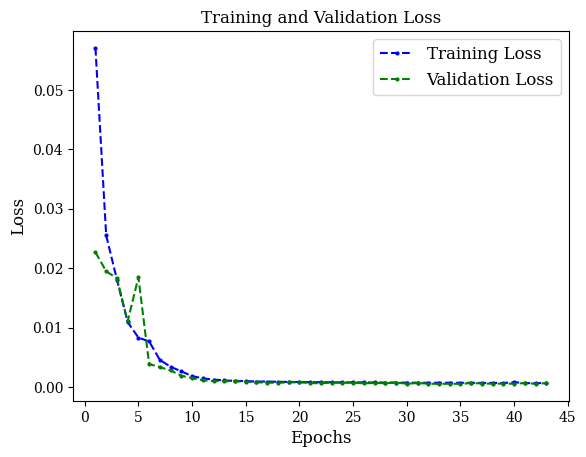

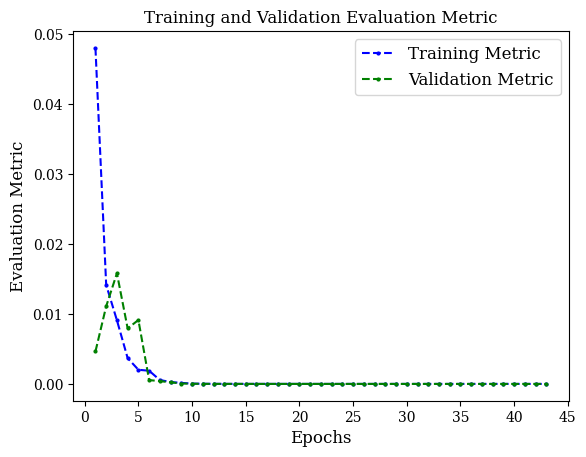

In [16]:
plot = plots(history, trained_results_directory)
loss_plot = plot.loss()
evaluation_metric_plot = plot.evaluation_metric()

In [17]:
# Save the model
print('Saving the model...')
model.model.save(os.path.join(trained_results_directory, 'model.h5'))

Saving the model...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
